# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [86]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame


mouse_combined_df = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')
mouse_combined_df


# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [87]:
# Checking the number of mice.
len(mouse_combined_df["Mouse ID"].unique())

249

In [88]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data_row_series = mouse_combined_df.duplicated(subset=["Mouse ID", "Timepoint"])

duplicate_mice = mouse_combined_df[duplicate_data_row_series]["Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [89]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_all_data_row_series = mouse_combined_df["Mouse ID"].isin(duplicate_mice)
#dup_mice_all_data_row_series 

mouse_combined_df[dup_mice_all_data_row_series]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [90]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_combined_df[~dup_mice_all_data_row_series]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [91]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())

248

## Summary Statistics

In [92]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

drug_tv_gb = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]

drug_tv_gb.mean()
drug_tv_gb.median()
drug_tv_gb.var()
drug_tv_gb.std()
drug_tv_gb.sem()

summary_stats_df = pd.DataFrame ({"Mean Tumor Volume" : drug_tv_gb.mean(),
                                "Median Tumor Volume" : drug_tv_gb.median(),
                                 "Tumor Volume Variance": drug_tv_gb.var(),
                                 "Tumor Volume Std. Dev.": drug_tv_gb.std(),
                                 "Tumor Volume Std. Err.": drug_tv_gb.sem()})
summary_stats_df
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [93]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

func_dict = {"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]}

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_2_df = clean_df.groupby("Drug Regimen").agg(func_dict)
summary_stats_2_df


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

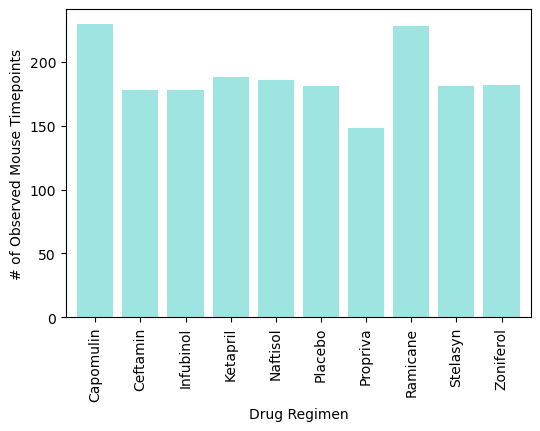

<Figure size 640x480 with 0 Axes>

In [94]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_reg_rows_df = clean_df.groupby(["Drug Regimen"])["Drug Regimen"].count()
drug_reg_rows_df

drug_reg_rows_chart = drug_reg_rows_df.plot(kind="bar", color="#3fccc5", alpha=0.5, width=(0.8), figsize=(6,4))
drug_reg_rows_chart.set_xlabel("Drug Regimen")
drug_reg_rows_chart.set_ylabel("# of Observed Mouse Timepoints")


plt.show()
plt.tight_layout()

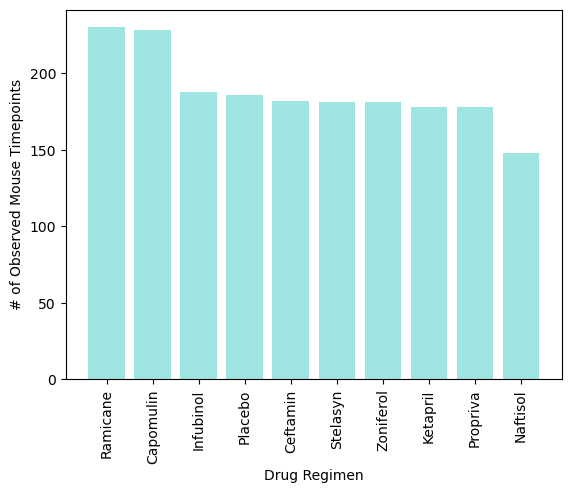

In [95]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

drug_reg_rows_df = clean_df.groupby(["Drug Regimen"])["Drug Regimen"].count()
drug_reg_rows_sorted = drug_reg_rows_df.sort_values(ascending=False)
drug_reg_rows_sorted
drug_reg_array = drug_reg_rows_sorted.values

x_axis = np.arange(len(drug_reg_array))

plt.bar(x_axis, drug_reg_array, color='#3fccc5', alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, clean_df["Drug Regimen"].unique(), rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()


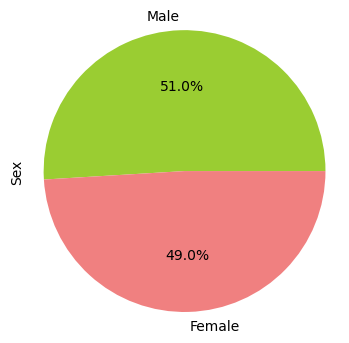

In [96]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

female_vs_male = clean_df.groupby("Sex")
female_vs_male_df1 = female_vs_male['Mouse ID'].count()
female_vs_male_df = female_vs_male_df1.sort_values(ascending=False)

colors= ["yellowgreen", "lightcoral"]

female_vs_male_pie = female_vs_male_df.plot(kind="pie", y='Sex', autopct='%.1f%%', colors=colors, figsize=(4,4))
female_vs_male_pie.set_ylabel("Sex")

plt.axis("equal")
plt.show()



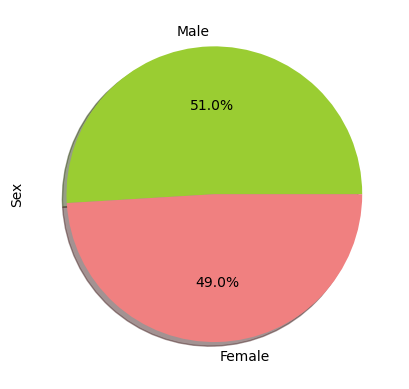

In [97]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex = ["Male", "Female"]
mouse_ID_count = female_vs_male_df

colors = ["yellowgreen", "lightcoral"]
plt.ylabel("Sex")
plt.pie(mouse_ID_count, labels=sex, colors=colors, autopct="%1.1f%%", shadow=True, startangle=0)
plt.show()


## Quartiles, Outliers and Boxplots

In [98]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

max_timepoint_df = clean_df.groupby("Mouse ID")["Timepoint"].max()
max_timepoint_df

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

timepoint_combined_df = pd.merge(max_timepoint_df, clean_df,
                                 how='left', on=['Mouse ID', 'Timepoint'])
timepoint_combined_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [99]:
# Put top treatments into a list for for loop (and later for plot labels)

treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data series (for plotting)

tumor_volume_data_list = []

# For each top treatment 

    # Locate the rows which contain mice on this drug and get the tumor volumes

for drug in treatment_list:
    tumor_volumes = timepoint_combined_df.loc[(timepoint_combined_df["Drug Regimen"] == drug)]["Tumor Volume (mm3)"]
    
    # add subset of tumor volumes to the plotting list
    
    tumor_volume_data = tumor_volume_data_list.append(tumor_volumes)
   
    # Calculate the IQR for this drug and quantitatively determine if there are any potential outliers 
    
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine potential outliers
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    print(outliers)
    
    # Print the results
    print(f"{drug}'s Potential Outliers: {outliers}\n")
   


Series([], Name: Tumor Volume (mm3), dtype: float64)
Capomulin's Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Infubinol's Potential Outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



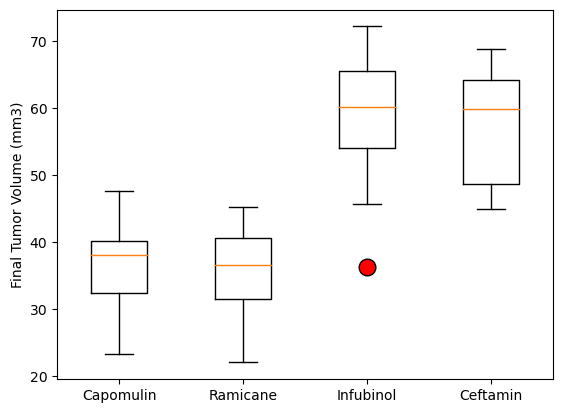

In [100]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(tumor_volume_data_list, labels=treatment_list, flierprops={'marker': 'o', 'markersize': 12, 'markerfacecolor': 'red'})
plt.ylabel('Final Tumor Volume (mm3)')

plt.show()



## Line and Scatter Plots

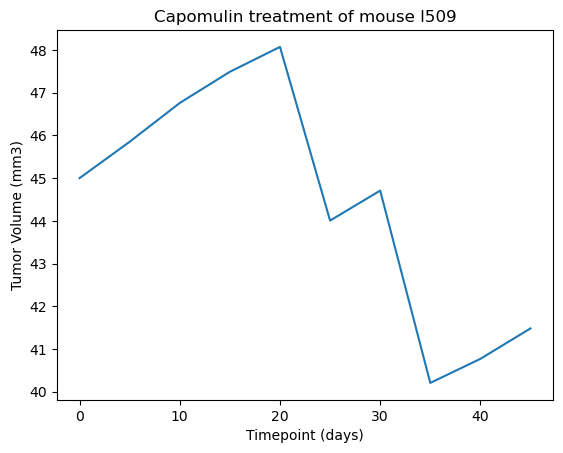

In [104]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

cap_df = clean_df.loc[clean_df['Drug Regimen'] == "Capomulin"]
L509_df = cap_df.loc[cap_df["Mouse ID"] == "l509"]
plt.plot(L509_df['Timepoint'],L509_df['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()



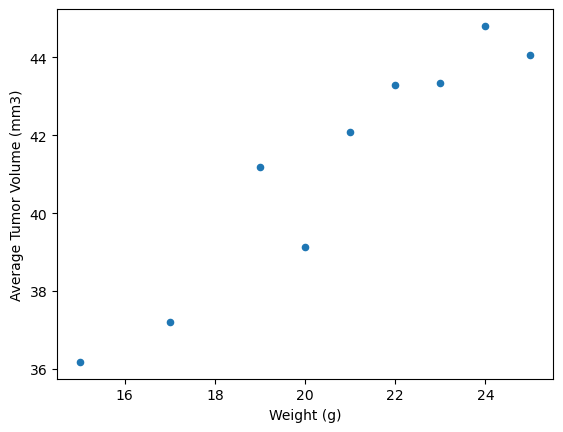

In [195]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

cap_df = clean_df.loc[clean_df['Drug Regimen'] == "Capomulin"]
cap_new_df = cap_df.drop(columns=["Sex", "Drug Regimen", "Age_months", "Timepoint", "Metastatic Sites"])

avg_weight_vol = cap_new_df.groupby("Weight (g)")["Tumor Volume (mm3)"].mean().reset_index()

avg_weight_vol.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [133]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen



